In [252]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# function to take image and convert it to numpy array

In [253]:
def npimage(s):
    image_ = Image.open(s)
    image_c = image_.convert('L')
    image = np.array(image_c)
    image = image.astype(np.float64)
    return image

# scale function to constrict pixel values to 0 to 255

In [254]:
def scale(image):
    current_max = np.max(image)
    current_min = np.min(image)
    scaled_image = ((image-current_min) / (current_max-current_min)) * 255
    return scaled_image

# check function for boundries

In [255]:
def c(i,j,n,m):
    if not(i<n and i>=0):
        return False
    if not(j<m and j>=0):
        return False
    return True

# image to zig zag

In [256]:
def zig_zag(image):
    n,m=image.shape
    l=[]
    row = 0
    col = 0
    rev=True
    while row < n:
        i = row
        j = col
        temp = []

        while c(i, j, n, m):
            temp.append(image[i, j])
            i += 1
            j -= 1


        if temp:
            if rev:
                l=l+temp[::-1]
                rev=False
            else:
                l=l+temp
                rev=True

        if col < m - 1:
            col += 1
        else:
            row += 1

    return np.array(l)


# zig zag to image

In [257]:
def zag_zig(l,n,m):
    image=np.zeros((n,m))
    row=0
    col=0
    ind=0
    rev=True
    while row < n:
        i = row
        j = col
        if rev:
            rev = False
            stack=[]
            while c(i, j, n, m):
                stack.append([i,j])
                i += 1
                j -= 1
            
            while stack:
                image[stack[-1][0],stack[-1][1]]=l[ind]
                stack.pop()
                ind+=1
            
        else:
            rev = True
            while c(i, j, n, m):
                image[i, j]=l[ind]
                ind+=1
                i += 1
                j -= 1
                



        if col < m - 1:
            col += 1
        else:
            row += 1
    
    return image

# testing of above code

In [258]:
image_=npimage("dwt_image.png")
n,m=image_.shape
print(f'{n}, {m}')

369, 246


In [259]:
n=n//4
m=m//4
image=image_[0:n, 0:m]

In [264]:
zig_zag_t=zig_zag(image)
np.savetxt('zig_zag_t.txt', zig_zag_t, fmt='%d', delimiter=' ')

In [265]:
with open('zig_zag_tr.txt', 'r') as file:
    numbers = [int(line.strip()) for line in file]

    

zig_zag_tr = np.array(numbers)
image_i=zag_zig(zig_zag_tr,n,m)

In [266]:
print(np.mean((image_i-image)**2))

0.49215965787598004


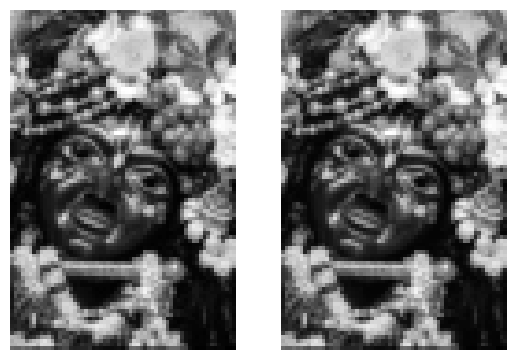

In [267]:
plt.subplot(1,2,1)
plt.imshow(image_i, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [268]:
plt.imshow(image_i, cmap='gray')
plt.axis('off')
plt.savefig('krishna_w.png', bbox_inches='tight', pad_inches=0)
plt.close()